In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dataset preprocessing

## Read dataset and first analysis

In [22]:
df = pd.read_csv('../resources/dataset/healthcare-dataset-stroke-data.csv')
df = df.drop(columns=['id'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data preprocessing

In [12]:
df.query("stroke == 0").count()

gender               4861
age                  4861
hypertension         4861
heart_disease        4861
ever_married         4861
work_type            4861
Residence_type       4861
avg_glucose_level    4861
bmi                  4700
smoking_status       4861
stroke               4861
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

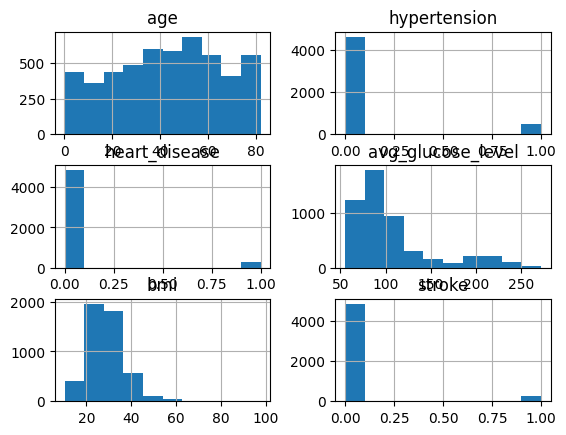

In [5]:
df['age']

### One-Hot encoding

In [23]:
columns_to_onehot = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_one_hot = pd.get_dummies(df[columns_to_onehot])
df = df.drop(columns_to_onehot, axis=1)
df = df.join(df_one_hot)

In [25]:
df

,age,avg_glucose_level,bmi,stroke,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,202.21,NaN,1,0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,105.92,32.5,1,0,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,171.23,34.4,1,0,0,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,174.12,24.0,1,1,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,NaN,0,1,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,125.20,40.0,0,0,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,82.99,30.6,0,0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,166.29,25.6,0,0,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


### Normalize data

In [30]:
columns_to_normalize = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

,age,avg_glucose_level,bmi,stroke,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,2.706375,0.981345,1,0,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,0.786070,2.121559,NaN,1,0,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,1.626390,-0.005028,0.459269,1,0,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,0.255342,1.437358,0.701207,1,0,0,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1.582163,1.501184,-0.623083,1,1,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


## Features importance

In [33]:
X = df.drop(columns=["stroke"]).values
y = df["stroke"].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

In [ ]:
reg = RandomForestClassifier(100, random_state=42)
reg.fit(X_train , y_train)